In [17]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Lade das Datenset
# Tausche hier die Daten aus
partei_datensatz = pd.read_csv("spoe.csv")
partei_name = "SPÖ"
Angelobung_Datum = "2007-01-11"


# Teste ob die Daten funktionieren
datensatz_kurz = partei_datensatz[1000:1005]
#print(datensatz_kurz["Inhalt"][1])

In [19]:
angelobung = pd.to_datetime(Angelobung_Datum)
print(angelobung)

2007-01-11 00:00:00


In [20]:
# Installiere wenn du ihn noch nicht hast, den Sentiment analyser
#pip install germansentiment

In [21]:
from germansentiment import SentimentModel


In [22]:
model = SentimentModel()

In [23]:
# Definiere die Funktion zur Berechnung des Scores

def sentiment_calculator(text):
    classes, probabilities = model.predict_sentiment([text], output_probabilities = True)
    # Berechnet einen Wert zwischen 1 und 3, wobei 3 sehr positiv ist und 1 sehr negativ.
    # Da uns das deutsche Sentiment Package nur die WSK gibt, habe ich daraus einen score kalkuliert.
    # 3 ist nur positiv, 2 ist komplett neutral, 1 ist komplett negativ
    score_zw_1_und_3 = (probabilities[0][0][1])*3+(probabilities[0][1][1])*1+(probabilities[0][2][1])*2
    # positive_wsk*3 + neutrale_wsk*2 + negative_wsk)*1
    return score_zw_1_und_3

In [24]:
# Speichert den Score in einer neuen Zeile
datensatz_kurz
#partei_datensatz["Sentiment Score"]=partei_datensatz["Inhalt"].apply(sentiment_calculator)
partei_datensatz["Sentiment Score"]=partei_datensatz["Inhalt"].apply(sentiment_calculator)


print(partei_datensatz[["Titel","Sentiment Score","Datum"]])

                                                  Titel  Sentiment Score  \
0     H e u t e : Bures/Darabos - Pressekonferenz um...         1.999994   
1     Sozialistische Jugend fordert Zerschlagung rec...         1.975106   
2            12./13. Jänner 2006: SPÖ-Neujahrskonferenz         1.997250   
3     Prammer: Hohe Teilzeitquote bei Frauen Ausdruc...         1.982790   
4     Parnigoni: Kriminalitätsstatistik 2005 ist Leh...         1.990612   
...                                                 ...              ...   
9138  Gusenbauer: Zur Pflegelösung kommt "Aktion Sch...         1.997815   
9139  Cap: SPÖ-Forderung nach Rückforderungsverzicht...         1.991174   
9140  Dobnigg zu Pflege: SPÖ sorgt für Rechtssicherheit         1.981035   
9141  Matznetter besorgt: US-Hypothekenkrise ist noc...         1.987280   
9142  Wittmann zu aktueller Blutdoping-Affäre: Krimi...         1.995940   

                    Datum  
0     2006-01-11 08:32:58  
1     2006-01-11 08:40:11  
2  

In [25]:
# Schaut, ob der Tag vor oder nach der Angelobung liegt

def datums_checker(veröffentlichungs_datum):
    kurzes_datum =pd.to_datetime(veröffentlichungs_datum[:10])
    if kurzes_datum > angelobung:
        return 1
    else:
        return 0
    

partei_datensatz["Nach Angelobung"]=partei_datensatz["Datum"].apply(datums_checker)

print(partei_datensatz)

                    Datum                                              Titel  \
0     2006-01-11 08:32:58  H e u t e : Bures/Darabos - Pressekonferenz um...   
1     2006-01-11 08:40:11  Sozialistische Jugend fordert Zerschlagung rec...   
2     2006-01-11 09:27:01         12./13. Jänner 2006: SPÖ-Neujahrskonferenz   
3     2006-01-11 10:13:29  Prammer: Hohe Teilzeitquote bei Frauen Ausdruc...   
4     2006-01-11 10:31:05  Parnigoni: Kriminalitätsstatistik 2005 ist Leh...   
...                   ...                                                ...   
9138  2008-01-11 14:21:04  Gusenbauer: Zur Pflegelösung kommt "Aktion Sch...   
9139  2008-01-11 14:31:39  Cap: SPÖ-Forderung nach Rückforderungsverzicht...   
9140  2008-01-11 14:49:33  Dobnigg zu Pflege: SPÖ sorgt für Rechtssicherheit   
9141  2008-01-11 15:09:52  Matznetter besorgt: US-Hypothekenkrise ist noc...   
9142  2008-01-11 15:42:38  Wittmann zu aktueller Blutdoping-Affäre: Krimi...   

                                       

In [26]:
partei_datensatz["Sentiment Score"]


0       1.999994
1       1.975106
2       1.997250
3       1.982790
4       1.990612
          ...   
9138    1.997815
9139    1.991174
9140    1.981035
9141    1.987280
9142    1.995940
Name: Sentiment Score, Length: 9143, dtype: float64

In [27]:
# Berechne den Durchschnitt vor der Angelobung
vor_angelobung_avg = partei_datensatz[partei_datensatz["Nach Angelobung"] == 0]["Sentiment Score"].mean()
print(vor_angelobung_avg)

vor_angelobung_std = partei_datensatz[partei_datensatz["Nach Angelobung"] == 0]["Sentiment Score"].std()
print(vor_angelobung_std)

vor_angelobung_len = len(partei_datensatz[partei_datensatz["Nach Angelobung"] == 0])
print(vor_angelobung_len)


# Berechne den Durschnitt nach der Angelobung
nach_angelobung_avg = partei_datensatz[partei_datensatz["Nach Angelobung"] == 1]["Sentiment Score"].mean()
print(nach_angelobung_avg)

nach_angelobung_std = partei_datensatz[partei_datensatz["Nach Angelobung"] == 1]["Sentiment Score"].std()
print(nach_angelobung_std)

nach_angelobung_len = len(partei_datensatz[partei_datensatz["Nach Angelobung"] == 1])
print(nach_angelobung_len)

print(f"{partei_name} Durchschnitt vor der Angelobung: {vor_angelobung_avg}")
print(f"{partei_name} Durchschnitt nach der Angelobung: {nach_angelobung_avg}")

1.8520886830901564
0.2939444559646273
4824
1.9478106090965914
0.16717268929036702
4319
SPÖ Durchschnitt vor der Angelobung: 1.8520886830901564
SPÖ Durchschnitt nach der Angelobung: 1.9478106090965914


In [28]:
# Berechne den t-test
group1 = np.random.normal(vor_angelobung_avg, vor_angelobung_std, vor_angelobung_len)
group2 = np.random.normal(nach_angelobung_avg, nach_angelobung_std, nach_angelobung_len)

# t-Test durchführen
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Welch's t-test (ungleiche Varianzen)
print(f"T-Wert: {t_stat:.3f}, p-Wert: {p_value:.3f}")

T-Wert: -18.834, p-Wert: 0.000


In [29]:
partei_datensatz
# Sortiere die Daten nach Monat
def datums_kürzer(veröffentlichungs_datum):
    jahr_monat = veröffentlichungs_datum[:7]
    return jahr_monat
    

partei_datensatz["Jahr_Monat"]=partei_datensatz["Datum"].apply(datums_kürzer)

print(partei_datensatz)

                    Datum                                              Titel  \
0     2006-01-11 08:32:58  H e u t e : Bures/Darabos - Pressekonferenz um...   
1     2006-01-11 08:40:11  Sozialistische Jugend fordert Zerschlagung rec...   
2     2006-01-11 09:27:01         12./13. Jänner 2006: SPÖ-Neujahrskonferenz   
3     2006-01-11 10:13:29  Prammer: Hohe Teilzeitquote bei Frauen Ausdruc...   
4     2006-01-11 10:31:05  Parnigoni: Kriminalitätsstatistik 2005 ist Leh...   
...                   ...                                                ...   
9138  2008-01-11 14:21:04  Gusenbauer: Zur Pflegelösung kommt "Aktion Sch...   
9139  2008-01-11 14:31:39  Cap: SPÖ-Forderung nach Rückforderungsverzicht...   
9140  2008-01-11 14:49:33  Dobnigg zu Pflege: SPÖ sorgt für Rechtssicherheit   
9141  2008-01-11 15:09:52  Matznetter besorgt: US-Hypothekenkrise ist noc...   
9142  2008-01-11 15:42:38  Wittmann zu aktueller Blutdoping-Affäre: Krimi...   

                                       

In [30]:
durchschnitt_pro_monat = partei_datensatz.groupby('Jahr_Monat')['Sentiment Score'].mean()
print(durchschnitt_pro_monat)
monatswert = pd.DataFrame(durchschnitt_pro_monat)
x = monatswert.index.to_list()
y = monatswert["Sentiment Score"].to_list()
print(y)

Jahr_Monat
2006-01    1.842841
2006-02    1.825977
2006-03    1.841818
2006-04    1.832044
2006-05    1.840365
2006-06    1.867621
2006-07    1.820005
2006-08    1.839949
2006-09    1.833701
2006-10    1.927562
2006-11    1.909376
2006-12    1.904532
2007-01    1.937428
2007-02    1.939749
2007-03    1.967023
2007-04    1.933056
2007-05    1.953217
2007-06    1.933964
2007-07    1.954608
2007-08    1.950562
2007-09    1.954567
2007-10    1.952093
2007-11    1.953736
2007-12    1.930646
2008-01    1.980221
Name: Sentiment Score, dtype: float64
[1.8428412943386814, 1.825976687879546, 1.8418178169752384, 1.8320441188925192, 1.840364557352042, 1.8676209238583361, 1.8200046939214134, 1.8399489766925472, 1.8337011825717318, 1.927562161898425, 1.909376020683317, 1.9045318466043304, 1.9374284334909715, 1.9397487268893665, 1.9670231239558673, 1.9330562195648866, 1.9532165839021771, 1.9339636088564685, 1.9546080779687762, 1.9505616680658147, 1.9545669522172646, 1.952093231557536, 1.9537355518396

In [31]:
# Speichert in neuem Datensatz
partei_datensatz.to_csv("mit_sentiment_score")
monatswert.to_csv("liniendiagramm")

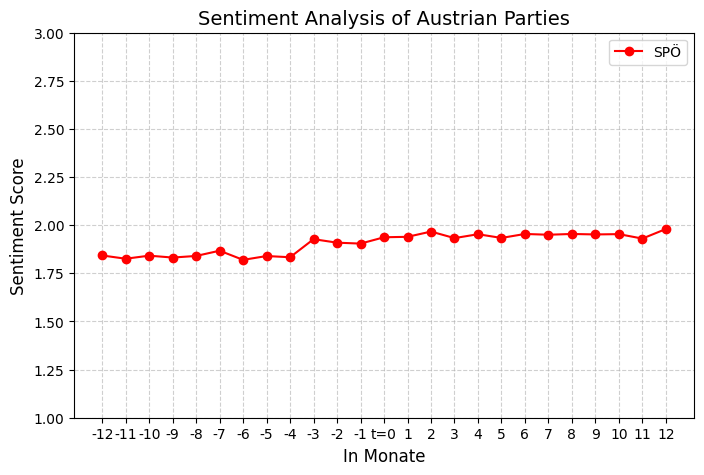

In [32]:
plt.figure(figsize=(8, 5))
x = [-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, "t=0", 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.plot(x, y, marker='o', linestyle='-', color='r', label='SPÖ')
plt.ylim(1, 3)


# Diagrammbeschriftungen und Titel
plt.title('Sentiment Analysis of Austrian Parties', fontsize=14)
plt.xlabel('In Monate', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)

# Gitter und Legende hinzufügen
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)

# Diagramm anzeigen
plt.show()